In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.7.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10
NUM_EPOCHS    = 10
LEARNING_RATE = 0.00005

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=False,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=False,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

/share/pkg.7/tensorflow/2.7.0/install/lib/SCC/../python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 8212 images belonging to 3 classes.
Found 2050 images belonging to 3 classes.


####  Build Model

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import applications 

In [5]:
conv_base_1=applications.VGG16(include_top=False,weights="imagenet",input_shape=(224,224,3))
conv_base_1.trainable=False
model_1=models.Sequential()
model_1.add(conv_base_1)
model_1.add(layers.Flatten())
model_1.add(layers.Dense(4096,activation="relu"))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(1024,activation="relu"))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(256,activation="relu"))
model_1.add(layers.Dense(64,activation="relu",name='feature_dense_1'))
model_1.add(layers.Dense(3,activation="softmax"))

print(model_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              4195328   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2

#### Train Model

In [7]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                loss='categorical_crossentropy',
                metrics=['acc'])

In [9]:
print(len(train_batches))
print(len(valid_batches))
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
history_1=model_1.fit(train_batches,steps_per_epoch=STEP_SIZE_TRAIN,validation_steps=STEP_SIZE_VALID,epochs=NUM_EPOCHS,validation_data=valid_batches,verbose=1)

822
205


/share/pkg.7/tensorflow/2.7.0/install/lib/SCC/../python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/share/pkg.7/tensorflow/2.7.0/install/lib/SCC/../python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
821/821 [==============================] - 4871s 6s/step - loss: 1.0444 - acc: 0.5483 - val_loss: 0.9652 - val_acc: 0.5922
Epoch 2/10
821/821 [==============================] - 4845s 6s/step - loss: 0.9509 - acc: 0.5827 - val_loss: 0.9581 - val_acc: 0.5820
Epoch 3/10
821/821 [==============================] - 4840s 6s/step - loss: 0.9117 - acc: 0.5892 - val_loss: 1.0821 - val_acc: 0.4137
Epoch 4/10
821/821 [==============================] - 4838s 6s/step - loss: 0.8887 - acc: 0.5966 - val_loss: 0.9967 - val_acc: 0.5166
Epoch 5/10
821/821 [==============================] - 4840s 6s/step - loss: 0.8586 - acc: 0.6070 - val_loss: 0.9341 - val_acc: 0.5854
Epoch 6/10
821/821 [==============================] - 4851s 6s/step - loss: 0.8331 - acc: 0.6163 - val_loss: 0.9363 - val_acc: 0.5941
Epoch 7/10
821/821 [==============================] - 4827s 6s/step - loss: 0.8219 - acc: 0.6242 - val_loss: 0.9228 - val_acc: 0.5946
Epoch 8/10
821/821 [==============================] - 4830s 6s

#### Plot Accuracy and Loss During Training

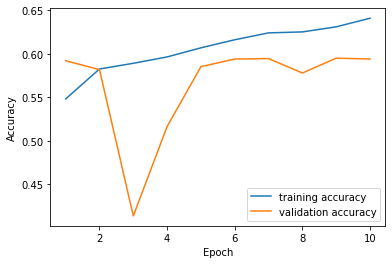

In [19]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
e_arr=list(range(1,11))
plt.plot(e_arr,history_1.history['acc'],fillstyle="left",label='training accuracy')
plt.plot(e_arr,history_1.history['val_acc'],fillstyle="right",label = 'validation accuracy')
plt.legend(loc='lower right')
plt.show()

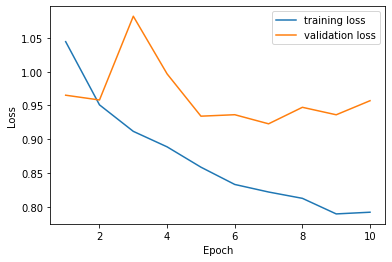

In [20]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
e_arr=list(range(1,11))
plt.plot(e_arr,history_1.history['loss'],fillstyle="left",label='training loss')
plt.plot(e_arr,history_1.history['val_loss'],fillstyle="right",label = 'validation loss')
plt.legend(loc='upper right')
plt.show()

#### Testing Model

In [21]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model_1.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 3422 images belonging to 3 classes.
3422


/scratch/5247592.1.p100/ipykernel_17351/1493150212.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  x = model_1.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),


3422/3422 [==============================] - 1585s 463ms/step - loss: 2.6753 - acc: 0.4527
Test loss: 2.675276041030884
Test accuracy: 0.4526592493057251


##  TSNE Plot

In [22]:
from sklearn.manifold import TSNE

intermediate_layer_model_1 = models.Model(inputs=model_1.input,
                                        outputs=model_1.get_layer('feature_dense_1').output)
intermediate_layer_model_2 = models.Model(inputs=model_2.input,
                                        outputs=model_2.get_layer('feature_dense_2').output)
tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")

Found 10262 images belonging to 3 classes.


In [23]:
X_predicted_1=intermediate_layer_model_1.predict(tsne_eval_generator)
X_embedded_1 = TSNE(n_components=2).fit_transform(X_predicted_1)

/share/pkg.7/python3/3.9.9/install/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/share/pkg.7/python3/3.9.9/install/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


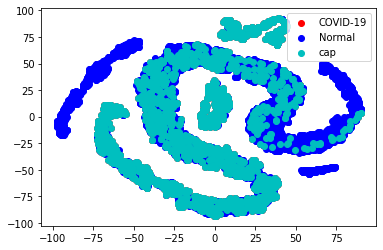

In [24]:
for i in range(len(tsne_eval_generator)):
    color=tsne_eval_generator[i][1].argmax()
    if color==0:
        s1=plt.scatter(X_embedded_1[i, 0], X_embedded_1[i, 1],c='r')
    elif color==1:
        s2=plt.scatter(X_embedded_1[i, 0], X_embedded_1[i, 1],c='b')
    elif color==2:
        s3=plt.scatter(X_embedded_1[i, 0], X_embedded_1[i, 1],c='c')
plt.legend((s1,s2,s3),('COVID-19','Normal','cap') ,loc = 'best')
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->